In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta
import seaborn as sns

In [38]:
df = pd.read_csv('Car Sales with surname.csv', sep = ";")

In [39]:
df

,Car_id,Date,Customer surname,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Rodriquez,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Sherman,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Ball,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Moran,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Car_id - Unique identifier for each car.
Date - Date of the car sale transaction.
Customer surname - Surname of the customer purchasing the car.
Customer Name - Name of the customer purchasing the car.
Gender - Gender of the customer (e.g., Male, Female).
Annual Income - Annual income of the customer.
Dealer_Name - Name of the car dealer associated with the sale.
Company - Company or brand of the car.
Model - Model name of the car.
Engine - Specifications of the car's engine.
Transmission - Type of transmission in the car (e.g., Automatic, Manual).
Color - Color of the car's exterior.
Price ($) - Price
Dealer_No - Dealer identification number associated with the sale.
Body Style - Style or design of the car's body (e.g., Sedan, SUV).
Phone - Contact phone number associated with the car sale.
Dealer_Region - Geographic region or location of the car dealer.

*1.Изучение загруженного датасета.*

In [40]:
#определение размера датасета
df.shape

(23906, 17)

In [41]:
#переименование столбцов датасета
df = df.rename(columns = lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df = df.rename(columns = {'price_($)': 'price'})
df.head(10)

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no_,body_style,phone,dealer_region
0,C_CND_000001,1/2/2022,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
5,C_CND_000006,1/2/2022,Sharp,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
6,C_CND_000007,1/2/2022,Chavez,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
7,C_CND_000008,1/2/2022,Jones,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,DoubleÂ Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
8,C_CND_000009,1/2/2022,Morgan,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
9,C_CND_000010,1/2/2022,Sanchez,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,DoubleÂ Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale


In [42]:
#информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_id            23906 non-null  object
 1   date              23906 non-null  object
 2   customer_surname  23906 non-null  object
 3   customer_name     23905 non-null  object
 4   gender            23906 non-null  object
 5   annual_income     23906 non-null  int64 
 6   dealer_name       23906 non-null  object
 7   company           23906 non-null  object
 8   model             23906 non-null  object
 9   engine            23906 non-null  object
 10  transmission      23906 non-null  object
 11  color             23906 non-null  object
 12  price             23906 non-null  int64 
 13  dealer_no_        23906 non-null  object
 14  body_style        23906 non-null  object
 15  phone             23906 non-null  int64 
 16  dealer_region     23906 non-null  object
dtypes: int64(3),

In [43]:
#опреление типов данных
df.dtypes

car_id              object
date                object
customer_surname    object
customer_name       object
gender              object
annual_income        int64
dealer_name         object
company             object
model               object
engine              object
transmission        object
color               object
price                int64
dealer_no_          object
body_style          object
phone                int64
dealer_region       object
dtype: object

In [44]:
#смена типа данных для столбца с датой
df['date'] = pd.to_datetime(df['date'])

In [45]:
#статистические характеристики числовых столбцов
df.describe()

,date,annual_income,price,phone
count,23906,2.390600e+04,23906.000000,2.390600e+04
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846,7.497741e+06
min,2022-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000,6.746495e+06
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000,7.496198e+06
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000,8.248146e+06
max,2023-12-31 00:00:00,1.120000e+07,85800.000000,8.999579e+06
std,NaN,7.200064e+05,14788.687608,8.674920e+05


In [46]:
#статистические характеристики остальных столбцов
df.describe(include = 'object')

,car_id,customer_surname,customer_name,gender,dealer_name,company,model,engine,transmission,color,dealer_no_,body_style,dealer_region
count,23906,23906,23905,23906,23906,23906,23906,23906,23906,23906,23906,23906,23906
unique,23906,1024,3021,2,28,30,154,2,2,3,7,5,7
top,C_CND_023906,Morton,Thomas,Male,Progressive Shippers Cooperative Association No,Chevrolet,Diamante,DoubleÂ Overhead Camshaft,Auto,Pale White,85257-3102,SUV,Austin
freq,1,24,92,18798,1318,1819,418,12571,12571,11256,3814,6374,4135


In [47]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*100)

car_id
['C_CND_000001' 'C_CND_000002' 'C_CND_000003' ... 'C_CND_023904'
 'C_CND_023905' 'C_CND_023906']
----------------------------------------------------------------------------------------------------
customer_surname
['Gonzalez' 'Henderson' 'Taylor' ... 'Dahn' 'Dahne' 'Dahood']
----------------------------------------------------------------------------------------------------
customer_name
['Geraldine' 'Gia' 'Gianna' ... 'Pol' 'Teho' 'Djamel Epoine']
----------------------------------------------------------------------------------------------------
gender
['Male' 'Female']
----------------------------------------------------------------------------------------------------
dealer_name
["Buddy Storbeck's Diesel Service Inc" 'C & M Motors Inc' 'Capitol KIA'
 'Chrysler of Tri-Cities' 'Chrysler Plymouth' 'Classic Chevy'
 'Clay Johnson Auto Sales' 'U-Haul CO' 'Rabun Used Car Sales'
 'Race Car Help' 'Saab-Belle Dodge' 'Scrivener Performance Engineering'
 'Diehl Motor CO Inc' 'Star Ente

2."Чистка" данных (удаление строк с null значениями, проверка на наличие дубликатов, удаление столбцов, неинформативных для анализа.

In [48]:
#определение количества отсутствующих значений в столбцах
df.isnull().sum()

car_id              0
date                0
customer_surname    0
customer_name       1
gender              0
annual_income       0
dealer_name         0
company             0
model               0
engine              0
transmission        0
color               0
price               0
dealer_no_          0
body_style          0
phone               0
dealer_region       0
dtype: int64

In [49]:
#удалим строку, содержащую null значения в столбце customer_name
df = df.dropna(subset = ['customer_name'])
df.isnull().sum()

car_id              0
date                0
customer_surname    0
customer_name       0
gender              0
annual_income       0
dealer_name         0
company             0
model               0
engine              0
transmission        0
color               0
price               0
dealer_no_          0
body_style          0
phone               0
dealer_region       0
dtype: int64

In [50]:
#проверка на наличие дубликатов.
df.duplicated().sum()

0

In [51]:
#удаление столбцов phone" и "dealer_no"(соответствует региону диллера) из-за неинформативности для анализа.

df.drop(['phone', 'dealer_no_'], axis=1, inplace=True)
df

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region
0,C_CND_000001,2022-01-02,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,2022-01-02,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,2022-01-02,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,2022-01-02,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,2022-01-02,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Rodriquez,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23902,C_CND_023903,2023-12-31,Sherman,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23903,C_CND_023904,2023-12-31,Ball,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23904,C_CND_023905,2023-12-31,Moran,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,Passenger,Austin


In [52]:
#исправление значения в столбце Engine
df['engine'] = df['engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')
df.head()

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region
0,C_CND_000001,2022-01-02,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,2022-01-02,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,2022-01-02,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,2022-01-02,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,2022-01-02,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


3. Группировка данных и построение графиков.

In [53]:
#создание новых столбцов
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df['day_of_week'] = df.date.dt.day_name()
df

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region,month,year,day_of_week
0,C_CND_000001,2022-01-02,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown,1,2022,Sunday
1,C_CND_000002,2022-01-02,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora,1,2022,Sunday
2,C_CND_000003,2022-01-02,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,1,2022,Sunday
3,C_CND_000004,2022-01-02,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,1,2022,Sunday
4,C_CND_000005,2022-01-02,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,1,2022,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Rodriquez,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco,12,2023,Sunday
23902,C_CND_023903,2023-12-31,Sherman,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown,12,2023,Sunday
23903,C_CND_023904,2023-12-31,Ball,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale,12,2023,Sunday
23904,C_CND_023905,2023-12-31,Moran,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,Passenger,Austin,12,2023,Sunday


In [54]:
df.date.max()

Timestamp('2023-12-31 00:00:00')

In [55]:
df.date.min()

Timestamp('2022-01-02 00:00:00')

In [56]:
#создание сводной таблицы кол-ва проданных авто по месяцам
df_pivot = df.pivot_table(index='month',
               columns='year',
               aggfunc={'date': 'count'},
               fill_value=0).rename(columns = {'date' : 'quantity'})
df_pivot

quantity      
year      2022  2023
month               
1          315   475
2          320   415
3          705   830
4          800   855
5          750  1145
6          690  1025
7          700  1025
8          810   895
9         1475  1830
10         835   995
11        1619  1850
12        1625  1921

<Figure size 640x480 with 0 Axes>

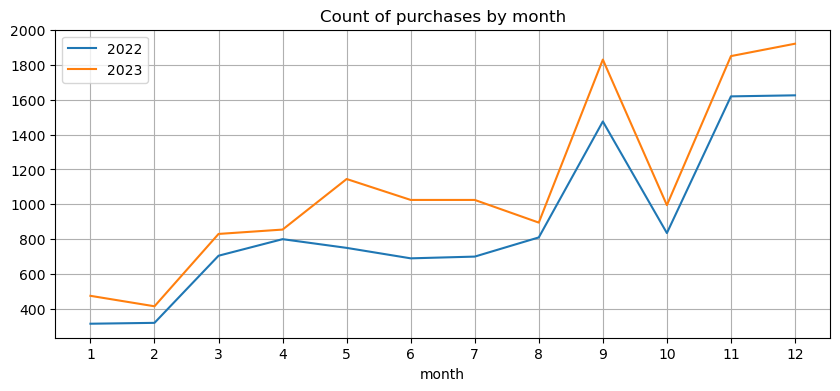

In [57]:
plt.figure()

df_pivot.plot(title = 'Сount of purchases by month', figsize=(10, 4))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.grid(True)
plt.legend(['2022', '2023'])

Очевидна положительная динамика по количеству продаж авто в 2023 году относительно каждого месяца предыдущего года. Минимальное количество продаж было в январе 2022 года, максимальное - в декабре 2023 года. 
Можно отметить также определённую сезонность приобретения авто: значительный рост количества продаж - в сентябре и в период ноябрь-декабрь, спад продаж - в период январь-февраль. 

In [58]:
#создание сводной таблицы, содержащей информацию по продажам за каждый месяц
df_pivot2 = df.pivot_table(index='month',
               columns='year',
               aggfunc={'price': 'sum'},
               fill_value=0).rename(columns = {'price' : 'sales'})
df_pivot2

sales          
year       2022      2023
month                    
1       8931920  12764298
2       8795365  11848580
3      19502059  22203814
4      22748867  24115567
5      20608086  32613157
6      19604211  28901691
7      19935002  28243030
8      23631362  25162276
9      42218216  51416962
10     23991509  28043756
11     45344290  51590388
12     44984458  54281601

<Figure size 640x480 with 0 Axes>

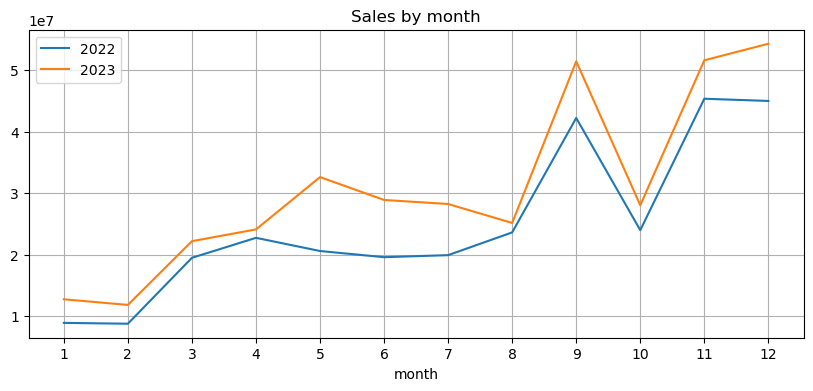

In [59]:
plt.figure()

df_pivot2.plot(title = 'Sales by month', figsize=(10, 4))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.grid(True)
plt.legend(['2022', '2023'])

Распределение дохода по месяцам 2022-2023 гг. точно такое же как и распределение по количеству проданных авто. Тенденция положительного роста продаж в 2023 году сохраняется.

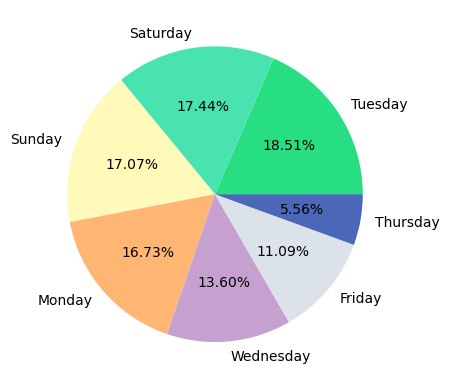

In [60]:
# Посмотрим, есть ли зависимость кол-ва покупок от дня недели.
df['day_of_week'].value_counts().plot.pie(autopct='%1.2f%%', colors = ['#28DE83', '#49E3B2', '#FFF9BA', '#FFB673', '#C6A1CF', '#DBE2E9', '#4B68B8'])
plt.ylabel('')
plt.show()

Можно заметить, что в четверг заметно меньше продаж, чем в остальные дни. Больше всего продаж приходится на выходные и, на удивление, на вторник.

In [61]:
#создание столбца, содержащую фамилию и имя покупателя
df['full_name'] = df['customer_name']+ ' ' + df['customer_surname']
df.head()

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region,month,year,day_of_week,full_name
0,C_CND_000001,2022-01-02,Gonzalez,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown,1,2022,Sunday,Geraldine Gonzalez
1,C_CND_000002,2022-01-02,Henderson,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora,1,2022,Sunday,Gia Henderson
2,C_CND_000003,2022-01-02,Taylor,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,1,2022,Sunday,Gianna Taylor
3,C_CND_000004,2022-01-02,Guerrero,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,1,2022,Sunday,Giselle Guerrero
4,C_CND_000005,2022-01-02,Fleming,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,1,2022,Sunday,Grace Fleming


In [62]:
df.full_name.value_counts()

full_name
Aria Fuentes      3
Brandon Corley    3
Nicolas Torres    2
Derek Lambert     2
Jace Figueroa     2
                 ..
Ryan Boehm        1
Ruben Boden       1
Royce Bock        1
Romeo Blum        1
Bianca Borja      1
Name: count, Length: 23664, dtype: int64

In [63]:
df_1 = df.groupby('full_name').agg({'car_id': 'count'}).rename(columns = {'car_id': 'count'}).reset_index()
df_1.query('count == 2')

,full_name,count
156,Abigail Coyle,2
289,Adelaide Wallace,2
392,Adrian Clements,2
482,Adrien Odonnell,2
522,Ahmed Clifford,2
...,...,...
23252,Yitzchok Page,2
23576,Zoe Block,2
23592,Zoe Cowley,2
23594,Zoe Crist,2


In [64]:
df_1.query('count == 3')

,full_name,count
2699,Aria Fuentes,3
4017,Brandon Corley,3


Среди покупателей есть те, кто совершил покупку авто более одного раза за 2022-23 гг: 237 человек купи 2 раза, 2 человека - 3.

In [65]:
#распределение кол-ва продаж по регионам
df.dealer_region.value_counts()

dealer_region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Greenville    3128
Middletown    3128
Name: count, dtype: int64

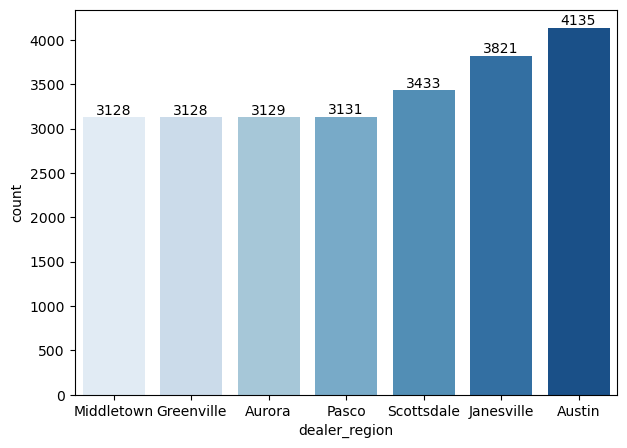

In [66]:
#распределение регионов по частоте приобретения авто
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df,x='dealer_region', order = df['dealer_region'].value_counts(ascending = True).index, palette = 'Blues')
for label in ax.containers:
    ax.bar_label(label)

В датасете представлены данные по 7 регионам. Больше всего автомобилей было продано в Остине за период 2022-23 гг.

In [67]:
#кол-во диллеров
df.dealer_name.nunique()

28

In [68]:
#Выведем топ 5 диллеров по сумме продаж
top5_dealers = df.groupby(['dealer_name']).agg({'price': 'sum'}).rename(columns = {'price' : 'sales'}).sort_values(by = 'sales',ascending = False).reset_index().head(5)
top5_dealers

,dealer_name,sales
0,Rabun Used Car Sales,37456655
1,Progressive Shippers Cooperative Association No,36751460
2,U-Haul CO,35876089
3,Race Car Help,35288706
4,Scrivener Performance Engineering,35258525


Исследуем предпочтения покупателей при покупке автомобилей.

In [69]:
#определение количества продаж в разрезе пола
df.gender.value_counts()

gender
Male      18797
Female     5108
Name: count, dtype: int64

In [70]:
#определение количества купленных авто в разрезе пола покупателя.
df_gender = df.groupby('gender').agg({'car_id': 'count'}).sort_values('gender', ascending = True)

Text(0, 0.5, '')

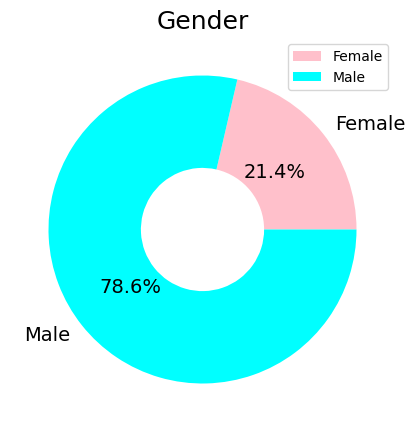

In [72]:
#соотношение покупок, совершаемых женщинами и мужчинами
df_gender.plot.pie(subplots=True, colors=["pink", "aqua"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5),wedgeprops=dict(width=0.6))
plt.title('Gender', fontsize=18)
plt.ylabel('')

Как не странно, чаще покупают автомобили мужчины. Только каждая пятая покупка совершается женщинами.

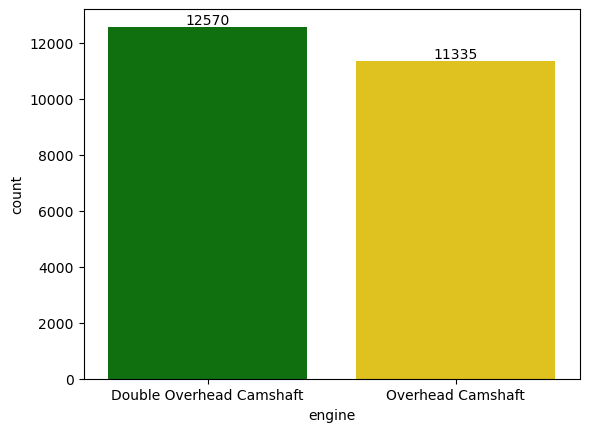

In [73]:
#определение соотношения типов двигателей
ax = sns.countplot(data=df,x='engine', palette= ['green','gold'])
for label in ax.containers:
    ax.bar_label(label)

Чаще покупают авто с типом двигателя DOHS, или «двойной верхний распределительный вал». DOHC — двигатель, в котором для привода клапанов используется сразу два распределительных вала. Его преимущество в том, что он более мощный и надёжный.

Text(0, 0.5, '')

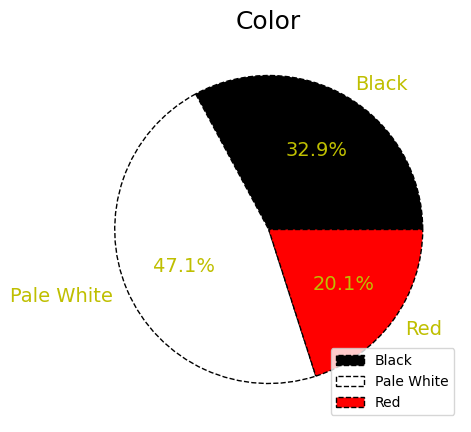

In [74]:
#соотношение покупаемых авто по цветам кузова
df_color = df.groupby('color').agg({'car_id': 'count'})
df_color.plot.pie(subplots=True, colors=["black", "white", "red"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5), wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, textprops={'color':"y"})
plt.title('Color', fontsize=18)
plt.ylabel('')

Почти половина покупателей предпочитает белый цвет авто.

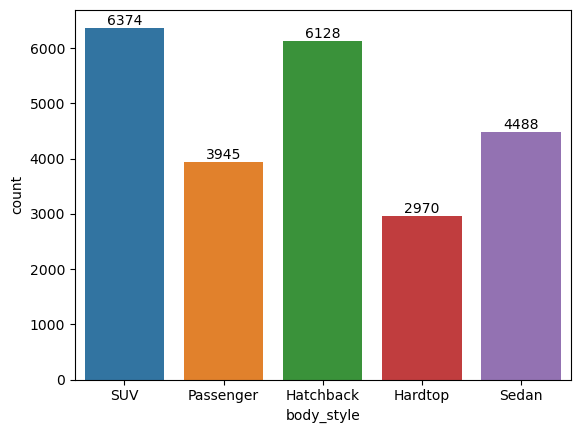

In [75]:
#выявление предпочтений покупателей по типу кузова
ax=sns.countplot(data=df,x= 'body_style')
for label in ax.containers:
    ax.bar_label(label)

Чаще всего покупатели выбирают внедорожники и хэтчбеки. Наименьшей популярностью пользуются, как не удивительно, хардтопы - это седан или купе без центральной стойки кузова и дверных рамок.

Text(0, 0.5, '')

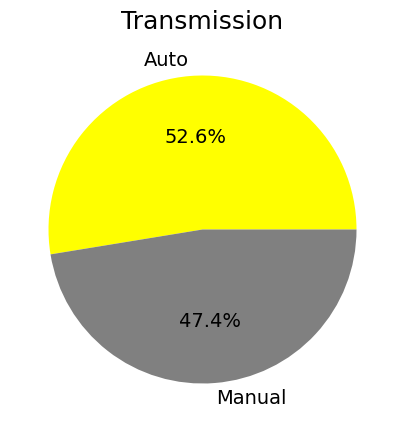

In [76]:
#соотношение покупок, совершаемых женщинами и мужчинами
df.transmission.value_counts().plot.pie(subplots=True, colors=["yellow", "grey"], autopct="%1.1f%%", fontsize=14, figsize=(5, 5))
plt.title('Transmission', fontsize=18)
plt.ylabel('')

Большинство покупателей предпочитают автомобили "на автомате".

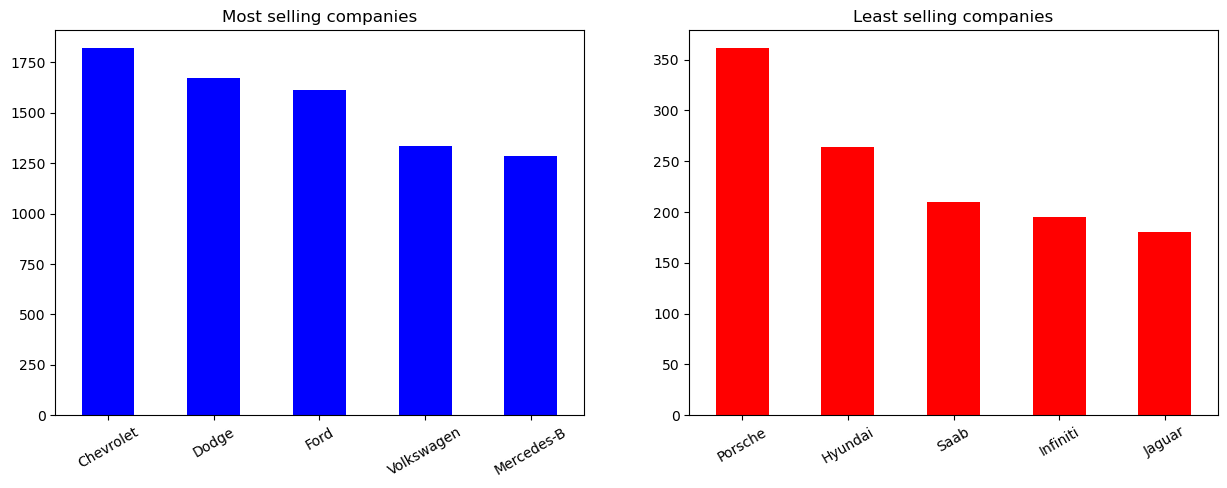

In [78]:
#Выявление наиболее топ 5 наиболее продаваемых и наименеее продаваемых марок автомобилей
fig,ax=plt.subplots(1,2,figsize=(15,5))

top_companies=df.company.value_counts().head(5)
unpopular_companies=df.company.value_counts().tail(5)

top_companies.plot(kind='bar',color='b',ax=ax[0])
ax[0].set_title('Most selling companies')
ax[0].set_ylabel('Count')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
plt.sca(ax[0])
plt.xticks(rotation=30)

unpopular_companies.plot(kind='bar',color='r',ax=ax[1])
ax[1].set_title('Least selling companies')
ax[1].set_ylabel('Count')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.sca(ax[1])
plt.xticks(rotation=30)

plt.show()

Наибольшей популярностью пользуются такие производители автомобилей, как Chevrolet, Dodge, Ford, Volkswagen, Mercedes-B. Меньше всего пользуются спросом Porsche, Hyundai, Saab, Infiniti и Jaguar.

In [79]:
#функция, подсчитывающая процент продаж для каждой модели компаний-производитедей, входящих в топ 5 по популярности у потребителей.
def calc(company):
    x=df['company']==company
    models=df[x]['model'].value_counts()
    length=len(df[x])
    percent=[(models[i]*100)/length for i in models.keys()]

    plt.figure(figsize=(20,5))
    plt.bar(x=models.keys(),height=percent)
    plt.title(f"Percent of each model of sales '{company}' ")
    plt.ylabel('Percent %')
    plt.xlabel('')
    plt.xticks(models.keys(),rotation=45)
    plt.show()

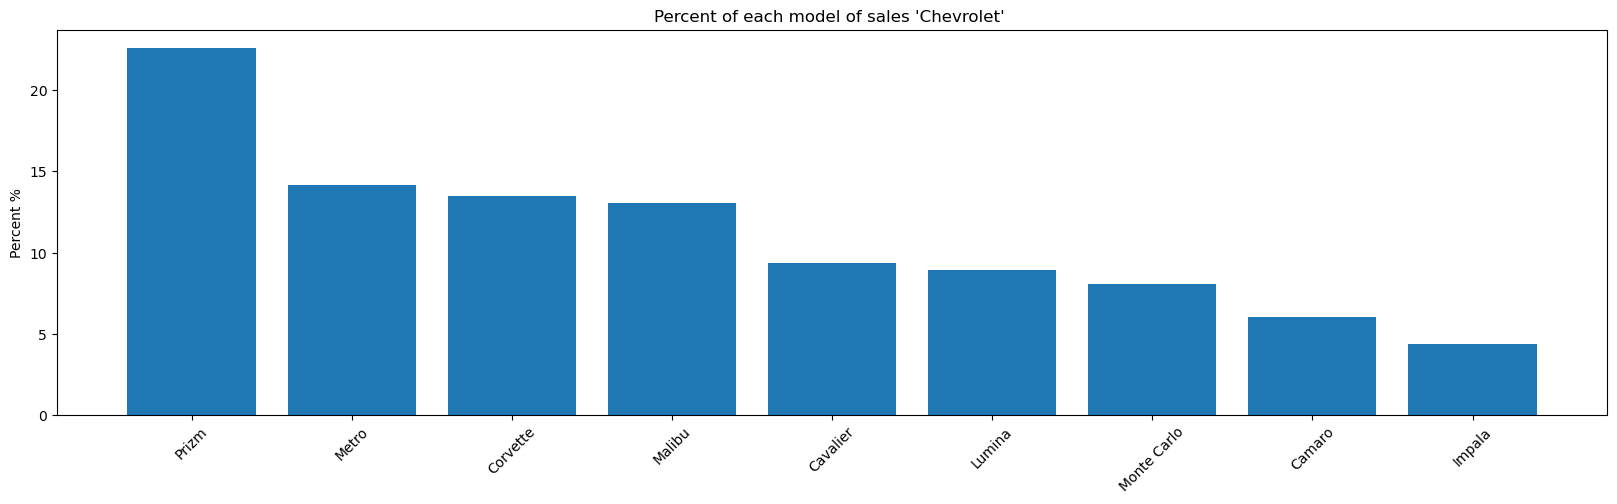

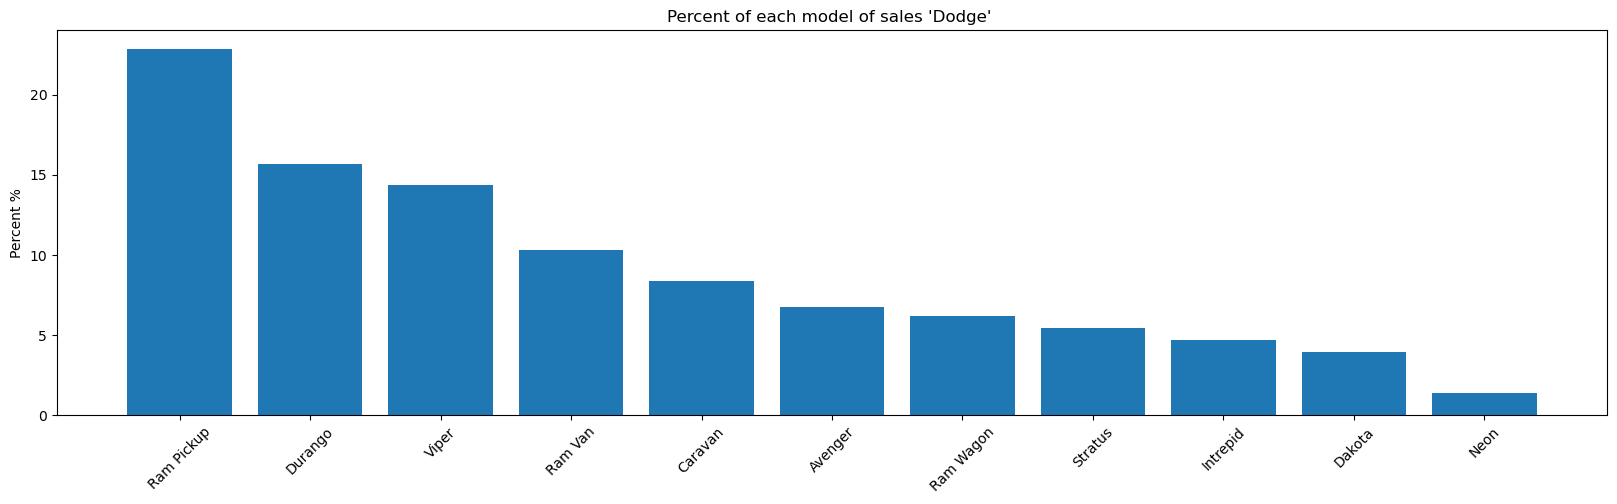

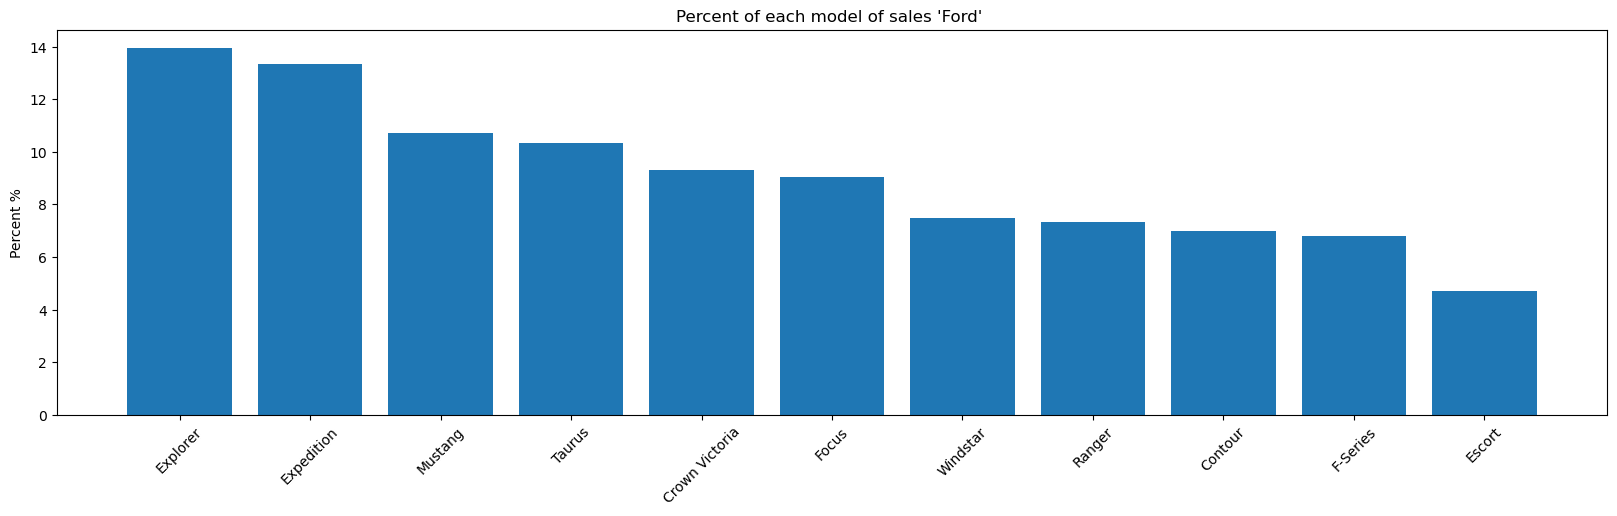

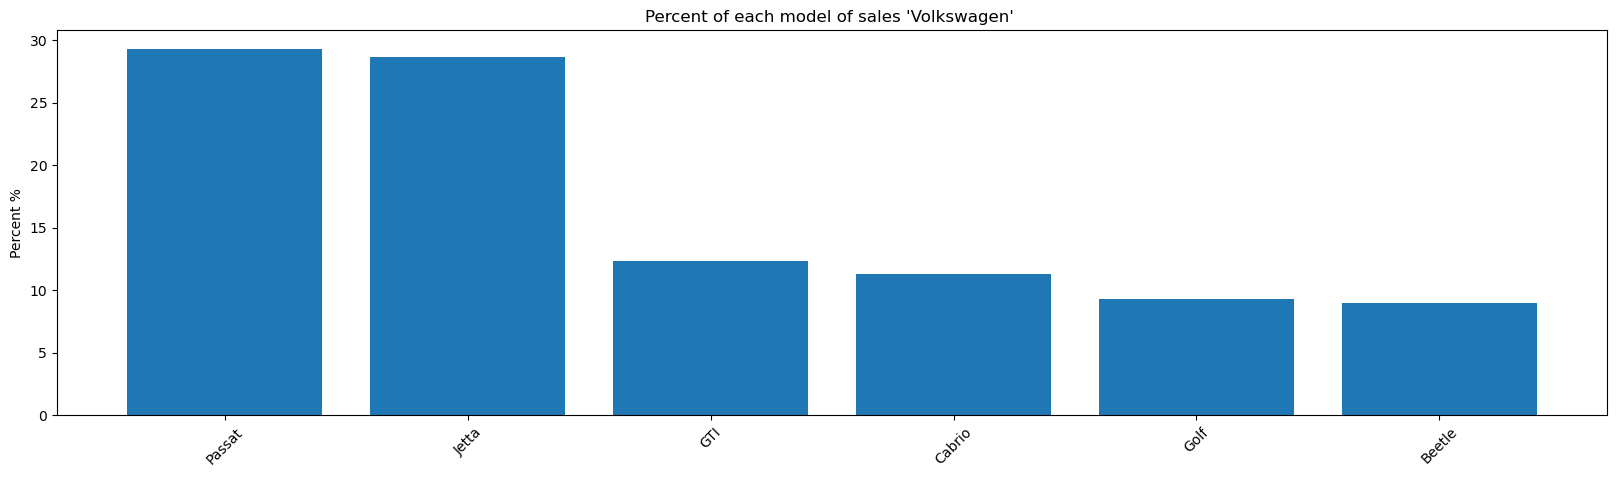

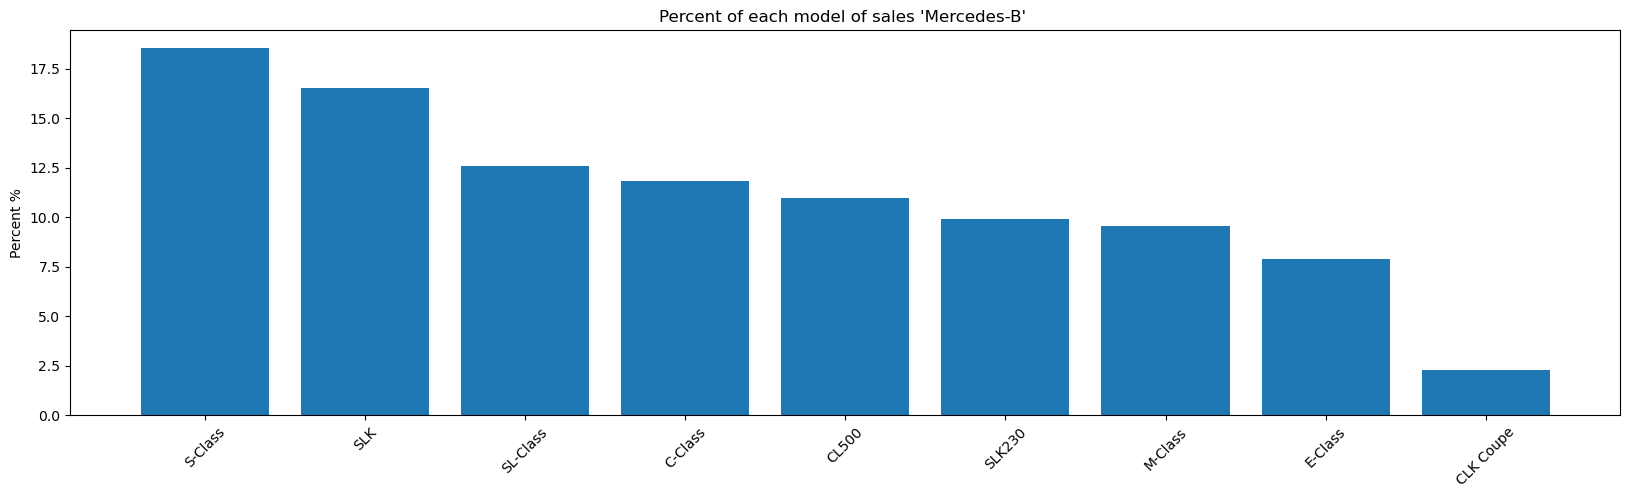

In [80]:
for i in top_companies.keys():
    calc(i)

In [81]:
df['company_model'] = df['company'] +' '+ df['model']
df.tail(3)

,car_id,date,customer_surname,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region,month,year,day_of_week,full_name,company_model
23903,C_CND_023904,2023-12-31,Ball,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale,12,2023,Sunday,Emma Ball,BMW 328i
23904,C_CND_023905,2023-12-31,Moran,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,Passenger,Austin,12,2023,Sunday,Victoire Moran,Chevrolet Metro
23905,C_CND_023906,2023-12-31,Fields,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,Double Overhead Camshaft,Auto,Pale White,27500,Hardtop,Middletown,12,2023,Sunday,Donovan Fields,Lexus ES300


In [82]:
#Выявим самые доходоприносящие модели
top3_models_sales = df.groupby(['company_model']).agg({'price': 'sum'}).rename(columns = {'price' : 'sales'}).sort_values(by = 'sales',ascending = False).reset_index().head(3)
top3_models_sales 

,company_model,sales
0,Lexus LS400,14263424
1,Volkswagen Jetta,12287736
2,Oldsmobile Silhouette,12271849


In [83]:
#Определим наиболее продаваемые модели
top_models_count = df.groupby('company_model').agg({'car_id': 'count'}).rename(columns = {'car_id': 'count'}).sort_values(by = 'count',ascending = False).reset_index().head(3)
top_models_count

,company_model,count
0,Mitsubishi Diamante,418
1,Chevrolet Prizm,411
2,Oldsmobile Silhouette,411


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

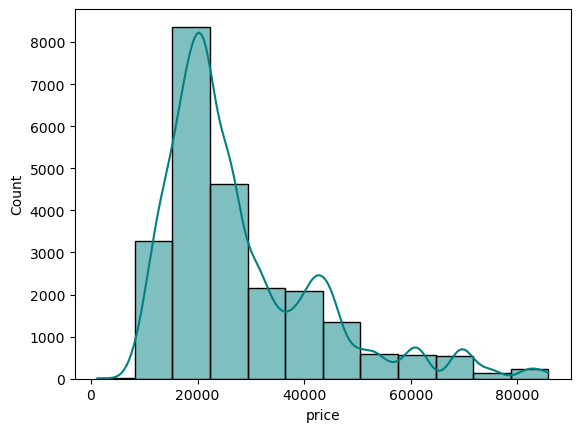

In [84]:
#построим распределение цены автомобилей
sns.histplot(data = df, x = 'price', bins =12, color = 'teal', kde = True)

In [87]:
#определение средней стоимости авто
df.price.mean()

28089.540472704455

In [88]:
#Определение среднего дохода потребителей и средней цены покупаемых авто
price_min = df['price'].min()
price_max = df['price'].max()
print(f'Min price: ${price_min:.2f}')
print(f'Max price of cars: ${price_max:.2f}')

Min price: $1200.00
Max price of cars: $85800.00


Можно заметить, что цена на авто варьируется от 1200 до 85 800 долл, при этом стоимость большинства проданных автомобилей в районе 20 тыс. долл.

Большинство покупателей, как можно было заметить, мужчины. Лишь пятая часть покупок авто приходится на женщин. Потребители предпочитают внедорожники или хэтчбеки белого цвета на "автомате" с типом двигателя DOHS, или «двойной верхний распределительный вал». Наибольшей популярностью пользуются такие производители автомобилей, как Chevrolet, Dodge, Ford, Volkswagen, Mercedes-B. При этом самая часто покупаемая модель - Mitsubishi Diamante. Средняя стоимость проданного авто составляет 28 тыс.долл.

Проанализируем годовой доход покупателей.

<Axes: xlabel='annual_income'>

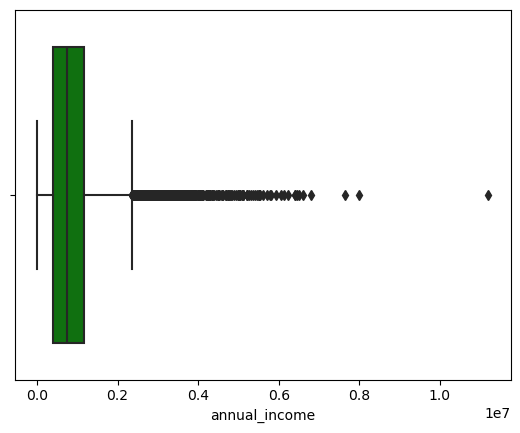

In [89]:
sns.boxplot(data=df,x='annual_income', color = 'g')

In [90]:
df.annual_income.mean()

830846.5951056264

In [91]:
df.annual_income.median()

735000.0

In [92]:
df.annual_income.min()

10080

In [93]:
df.annual_income.max()

11200000

Можно отметить, что разница между минимальным годовым доходом и максимальным огромна, т.е годовой доход покупателей варьируется от 10 080 до 11 200 000 долл. 
Средний годовой доход значительно отличается от медианного в большую сторону. Причиной этого является наличие большого количества аномально высоких значений дохода.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

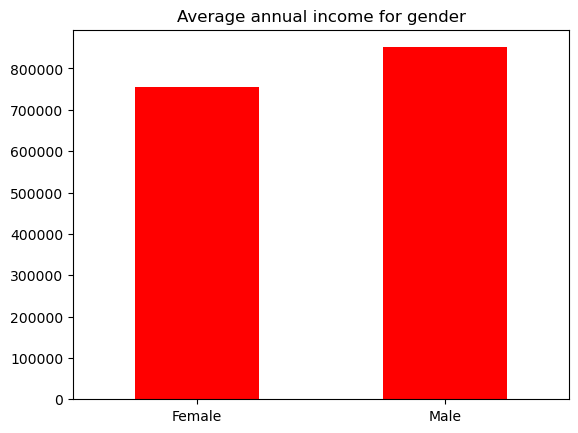

In [94]:
#Сравним средний доход женщин и мужчин
gender_avg_income=df.groupby('gender')['annual_income'].mean()
gender_avg_income.plot(kind='bar', color = 'r')
plt.title('Average annual income for gender')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)

Средний доход у мужчин приобретающих авто заметно выше среднего годового дохода женщин.

Рассчитаем основные метрики продаж за 2022-2023 гг.

In [95]:
#Найдём общий доход от продажи авто по годам.
sales_2022 = df[df['year'] ==2022].price.sum()
sales_2023 = df[df['year'] ==2023].price.sum()
print(f'Total sales for 2022: ${sales_2022:.2f}')
print(f'Total sales for 2023: ${sales_2023:.2f}')

Total sales for 2022: $300295345.00
Total sales for 2023: $371185120.00


In [96]:
#найдём кол-во проданных авто по годам
count_cars_2022 = df[df['year'] ==2022].car_id.nunique()
count_cars_2023 = df[df['year'] ==2023].car_id.nunique()
print(f'Count of sold cars for 2022: {count_cars_2022}')
print(f'Count of sold cars for 2023: {count_cars_2023}')

Count of sold cars for 2022: 10644
Count of sold cars for 2023: 13261


In [97]:
#Найдём среднюю стоимость автомобилей по годам.
avg_price_2022 = df[df['year'] ==2022].price.mean()
avg_price_2023 = df[df['year'] ==2023].price.mean()
print(f'Average price cars for 2022: ${avg_price_2022:.2f}')
print(f'Average price cars for 2023: ${avg_price_2023:.2f}')

Average price cars for 2022: $28212.64
Average price cars for 2023: $27990.73


Проверим, есть ли взаимосвязь между доходами потребителей и ценой автомобилей, которые они покупают.

In [100]:
#коэффициент корреляции
df.annual_income.corr(df.price)

0.01207532189820143

Полученное значение коэффициента корреляции близко к 0, то есть зависимость между доходом покупателя и стоимостью авто отсутствует. Проверим это с помощью графика корреляции.

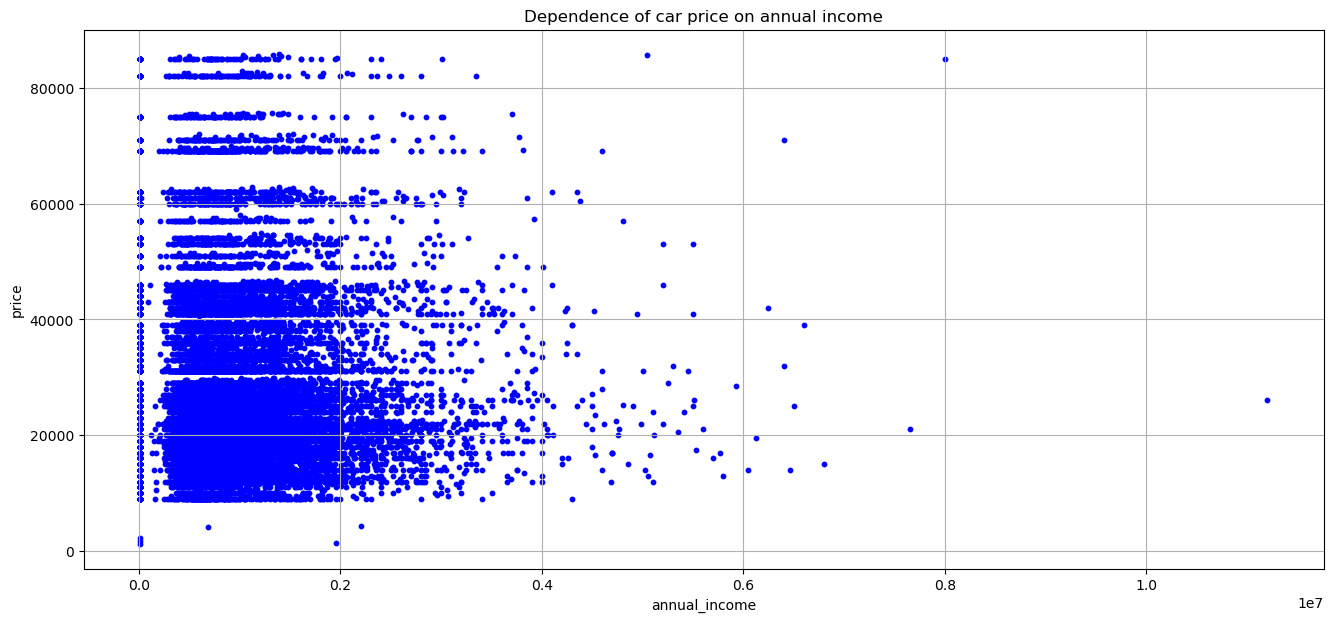

In [101]:
#зависимость годового дохода покупателя и стоимости авто.
df.plot.scatter(x="annual_income", y="price", title = 'Dependence of car price on annual income', s= 10 , c='blue', figsize=(16, 7),)
plt.grid(True)

Явной зависимости стоимости покупаемого автомобиля от годового дохода покупателя не наблюдается. Можно отметить, что превалирующая часть покупателей имеют годовой доход до 200 тыс.долл, при этом они покупают, как правило, авто стоимостью в диапазоне от 8 000 до 47 000 долл. При этом имеются аномалии: есть часть покупателей с доходом в районе 10 тыс. долл, но покупающих авто стоимостью в довольно широком диапазоне - от 1200 до 85 000 долл. А покупатель с наибольшим годовым доходом (11,2 млн.долл) купил авто стоимостью всего за 26 тыс. долл.

In [102]:
df.annual_income.max()

11200000

In [103]:
df[df['annual_income'] == 11200000].price

14026    26001
Name: price, dtype: int64

Построим корреляционную матрицу для показателей

In [104]:
#выводим числовые столбцы
cars=df[['price', 'annual_income']]

In [105]:
#создаем фиктивные переменные
df_dummy = pd.get_dummies(data=df[['gender', 'company', 'engine', 'transmission', 'color', 'body_style']], drop_first = True)
df_dummy

,gender_Male,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,company_Ford,company_Honda,...,company_Volkswagen,company_Volvo,engine_Overhead Camshaft,transmission_Manual,color_Pale White,color_Red,body_style_Hatchback,body_style_Passenger,body_style_SUV,body_style_Sedan
0,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,True,False,False
23902,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23903,True,False,True,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
23904,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [106]:
total_cars = pd.concat([cars, df_dummy], axis=1)

In [107]:
total_cars.corr()

,price,annual_income,gender_Male,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,company_Volkswagen,company_Volvo,engine_Overhead Camshaft,transmission_Manual,color_Pale White,color_Red,body_style_Hatchback,body_style_Passenger,body_style_SUV,body_style_Sedan
price,1.000000,0.012075,-0.006617,-0.050049,-0.037490,0.051284,0.145871,-0.036696,-0.031034,-0.031399,...,-0.041427,-0.003760,-0.011226,-0.011226,-0.038730,0.021902,-0.038213,0.025628,-0.053898,0.056674
annual_income,0.012075,1.000000,0.054209,-0.002196,0.000087,0.004765,0.019217,-0.012588,0.000667,0.001458,...,0.007923,0.001725,-0.006606,-0.006606,0.000836,-0.003176,0.016576,-0.006478,-0.006263,-0.001100
gender_Male,-0.006617,0.054209,1.000000,0.010314,-0.000110,0.005173,-0.008572,0.000263,-0.003226,0.005142,...,-0.001853,-0.001375,0.002668,0.002668,-0.008800,0.004375,0.002671,-0.011007,0.006229,0.003657
company_Audi,-0.050049,-0.002196,0.010314,1.000000,-0.026124,-0.019328,-0.023662,-0.040554,-0.031330,-0.038727,...,-0.034340,-0.026107,0.049639,0.049639,-0.009282,-0.065487,-0.073976,-0.032726,0.152414,-0.067937
company_BMW,-0.037490,0.000087,-0.000110,-0.026124,1.000000,-0.025286,-0.030956,-0.053055,-0.040987,-0.050665,...,-0.044926,-0.034155,-0.019961,-0.019961,-0.050140,0.017303,0.030810,-0.082188,0.059988,0.034567
company_Buick,0.051284,0.004765,0.005173,-0.019328,-0.025286,1.000000,-0.022903,-0.039253,-0.030325,-0.037485,...,-0.033239,-0.025269,-0.033794,-0.033794,0.003314,-0.030365,0.070976,0.066771,-0.072610,-0.033046
company_Cadillac,0.145871,0.019217,-0.008572,-0.023662,-0.030956,-0.022903,1.000000,-0.048055,-0.037125,-0.045891,...,-0.040692,-0.030936,-0.015511,-0.015511,-0.037548,-0.001749,-0.038316,0.086069,-0.037082,0.026696
company_Chevrolet,-0.036696,-0.012588,0.000263,-0.040554,-0.053055,-0.039253,-0.048055,1.000000,-0.063627,-0.078650,...,-0.069741,-0.053020,0.058291,0.058291,0.043168,-0.003828,-0.053587,0.050923,0.028537,-0.093531
company_Chrysler,-0.031034,0.000667,-0.003226,-0.031330,-0.040987,-0.030325,-0.037125,-0.063627,1.000000,-0.060761,...,-0.053878,-0.040961,-0.105480,-0.105480,0.026048,-0.024999,0.033954,-0.078835,0.006878,0.026729
company_Dodge,-0.031399,0.001458,0.005142,-0.038727,-0.050665,-0.037485,-0.045891,-0.078650,-0.060761,1.000000,...,-0.066599,-0.050632,-0.055496,-0.055496,-0.018830,0.036136,-0.031234,-0.026347,0.069662,-0.071243


Корреляция не наблюдается, что подтвержает ранее сделанные выводы о том, что нет прямой зависимости годового дохода покупателя и стоимости покупаемого авто.

Проведём RFM анализ:
Recency - количество дней с даты последней покупки
Frequency - количество покупок
Monetary_value - количество купленных товаров

In [131]:
last_date = df.date.max()
rfmTable = df.reset_index().groupby('full_name').agg({'date': lambda x: (last_date - x.max()).days,
                                                 'car_id': lambda x: len(x), 
                                                 'price': lambda x: x.sum()})
rfmTable.rename(columns={'date': 'Recency', 
                          'car_id': 'Frequency', 
                          'price': 'Monetary'}, inplace=True)

In [132]:
rfmTable

,Recency,Frequency,Monetary
full_name,,,
Aahil Church,215,1,24000
Aahil Curtis,117,1,45000
Aaliyah Barker,461,1,62000
Aaliyah Bierman,396,1,60500
Aaliyah Bolton,258,1,22000
...,...,...,...
Zyaire Bowers,509,1,71001
Zyaire Chu,618,1,19500
Zyaire Rollins,112,1,12000


In [133]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,114.0,1.0,18001.0
0.50,292.0,1.0,23000.0
0.75,466.0,1.0,35000.0


In [134]:
quantiles.to_dict()

{'Recency': {0.25: 114.0, 0.5: 292.0, 0.75: 466.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 18001.0, 0.5: 23000.0, 0.75: 35000.0}}

In [135]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [136]:
rfm_segmentation = rfmTable
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [137]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
full_name,,,,,,
Aahil Church,215,1,24000,3,1,3
Aahil Curtis,117,1,45000,3,1,4
Aaliyah Barker,461,1,62000,2,1,4
Aaliyah Bierman,396,1,60500,2,1,4
Aaliyah Bolton,258,1,22000,3,1,2
...,...,...,...,...,...,...
Zyaire Bowers,509,1,71001,1,1,4
Zyaire Chu,618,1,19500,1,1,2
Zyaire Rollins,112,1,12000,4,1,1


In [138]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
full_name,,,,,,,
Aahil Church,215,1,24000,3,1,3,313
Aahil Curtis,117,1,45000,3,1,4,314
Aaliyah Barker,461,1,62000,2,1,4,214
Aaliyah Bierman,396,1,60500,2,1,4,214
Aaliyah Bolton,258,1,22000,3,1,2,312


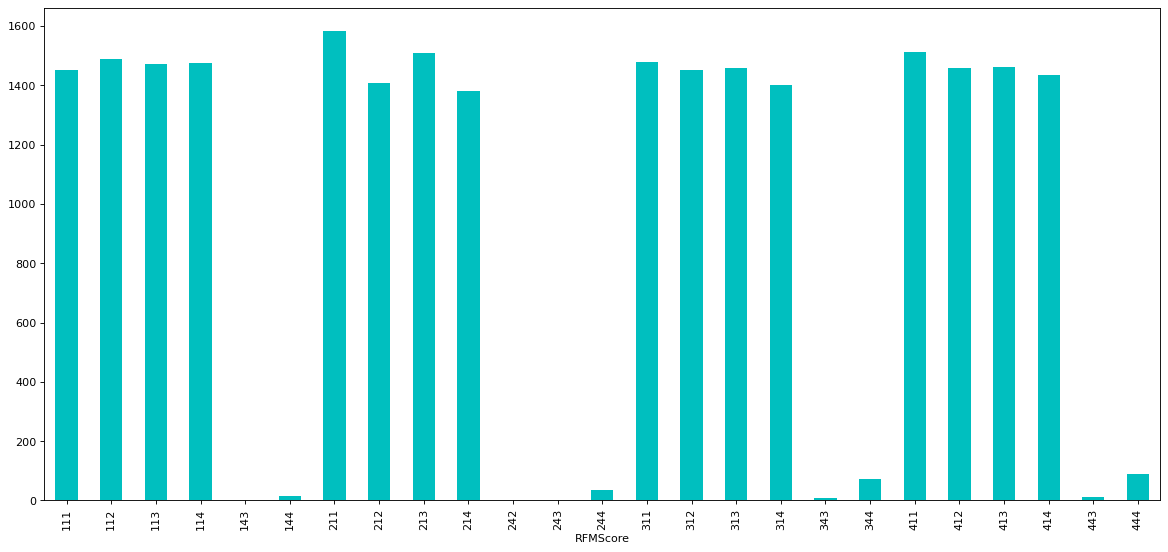

In [154]:
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
rfm_segmentation.groupby('RFMScore').agg('Recency').count().plot(kind='bar', color='c')
plt.show()

In [159]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore'] == '111']))

Best Customers:  90
Loyal Customers:  239
Big Spenders:  5904
Almost Lost:  35
Lost Customers:  14
Lost Cheap Customers:  1451


Самая многочисленная группа - 211, меньше всего - 242.
Можно заметить, что большая доля так называемых "потерянных" клиентов (группы 111-112), а наиболее лояльных клиентов, наоборот, очень мало (всего 90 человек).

In [145]:
rfm_segmentation.RFMScore.value_counts()

RFMScore
211    1583
411    1513
213    1509
112    1490
311    1477
114    1475
113    1471
413    1461
313    1458
412    1458
312    1453
111    1451
414    1435
212    1409
314    1401
214    1381
444      90
344      73
244      35
144      14
443      12
343       9
143       3
243       2
242       1
Name: count, dtype: int64

Выводы:
1. Очевидна положительная динамика по количеству продаж авто в 2023 году относительно каждого месяца предыдущего года. Минимальное количество продаж было в январе 2022 года, максимальное - в декабре 2023 года. 
Можно отметить также определённую сезонность приобретения авто: значительный рост количества продаж - в сентябре и в период ноябрь-декабрь, спад продаж - в период январь-февраль. Распределение дохода по месяцам 2022-2023 гг. точно такое же как и распределение по количеству проданных авто. Тенденция положительного роста продаж в 2023 году сохраняется.
2. Потребители предпочитают внедорожники или хэтчбеки белого цвета на "автомате" с типом двигателя DOHS, или «двойной верхний распределительный вал». Наибольшей популярностью пользуются такие производители автомобилей, как Chevrolet, Dodge, Ford, Volkswagen, Mercedes-B. При этом самая часто покупаемая модель - Mitsubishi Diamante. Средняя стоимость проданного авто составляет 28 тыс.долл.
3. Среди покупателей есть те, кто совершил покупку авто более одного раза за 2022-23 гг: 237 человек купи 2 раза, 2 человека - 3. 5. Большинство покупателей - мужчины. Лишь пятая часть покупок авто приходится на женщин.
4. Можно отметить, что разница между минимальным годовым доходом и максимальным огромна, т.е годовой доход покупателей варьируется от 10 080 до 11 200 000 долл. Средний годовой доход значительно отличается от медианного в большую сторону. Причиной этого является наличие большого количества аномально высоких значений дохода
5. Цена на авто варьируется от 1200 до 85 800 долл, при этом стоимость большинства проданных автомобилей в районе 20 тыс. долл.
6. Явной зависимости стоимости покупаемого автомобиля от годового дохода покупателя не наблюдается. Можно отметить, что превалирующая часть покупателей имеют годовой доход до 200 тыс.долл, при этом они покупают, как правило, авто стоимостью в диапазоне от 8 000 до 47 000 долл. При этом имеются аномалии: есть часть покупателей с доходом в районе 10 тыс. долл, но покупающих авто стоимостью в довольно широком диапазоне - от 1200 до 85 000 долл. А покупатель с наибольшим годовым доходом (11,2 млн.долл) купил авто стоимостью всего за 26 тыс. долл.
7. На основании проведённого rfm анализа выделены следующие сегменты покупателей:л.